# Split - Apply - Combine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
?pd.read_csv

In [3]:
df = pd.read_csv('data/dataframe_saved_v2.csv', parse_dates= ['Data'], usecols= list(range(0,6)))

In [4]:
df.dtypes

Data          datetime64[ns]
Distancia            float64
Tempo                 object
Segundos             float64
Minutos              float64
Min_Por_Km           float64
dtype: object

In [5]:
df.sort_index(inplace=True)

In [6]:
# aplicando funções apenas a coluna
df.Minutos.max()

260.71666666666664

In [7]:
df.Distancia.max()

26.2

In [8]:
df.Minutos.min()

6.2666666666666675

In [9]:
df.Distancia.min()

0.65

In [10]:
# split apply - fazendo um conjunto menor aplicando a função
df.Distancia[df.Distancia > 0].min()

0.65

In [11]:
df.Distancia[df.Distancia > 0].value_counts().index[0]

1.37

Text(0,0.5,'Distância')

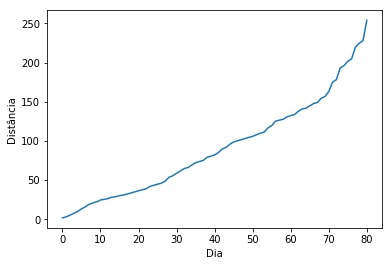

In [12]:
# cumsum - Soma acumulativa
df.Distancia.cumsum().plot()
plt.xlabel("Dia")
plt.ylabel("Distância")

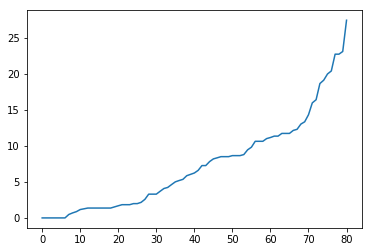

In [13]:
# unica instrução aplica varias funções diferentes
(df.Minutos.fillna(0).cumsum() / 60).plot()

In [14]:
# pega um dia especifico da semana - Sunday
df.Data[0].strftime("%A")

'Sunday'

In [15]:
# Capitura os dias da semana
df.Data.map(lambda x: x.strftime("%A")).head()

0      Sunday
1      Monday
2     Tuesday
3    Thursday
4      Friday
Name: Data, dtype: object

In [16]:
# Adicionamos uma nova coluna (aqui aplicamos split apply combine)
df['Dia_Semana'] = df.Data.map(lambda x: x.strftime("%A"))

In [17]:
df.head(10)

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km,Dia_Semana
0,2015-08-02,1.70,NaN,NaN,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,NaN,Friday
5,2015-08-08,3.40,NaN,NaN,NaN,NaN,Saturday
6,2015-08-09,2.50,NaN,NaN,NaN,NaN,Sunday
7,2015-08-10,3.36,0:28:37,1717.0,28.616667,8.516865,Monday
8,2015-08-11,1.67,0:13:07,787.0,13.116667,7.854291,Tuesday
9,2015-08-12,1.42,0:10:35,635.0,10.583333,7.453052,Wednesday


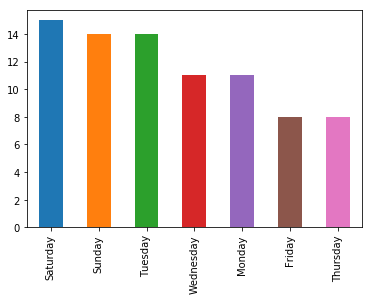

In [18]:
# df[df.Distancia > 0].Dia_Semana.value_counts().plot(kind = 'bar')
df[df.Distancia > 0].Dia_Semana.value_counts().plot(kind = 'bar')

In [19]:
# Como já temos minutos e segundos podemos excluir a coluna tempo
del(df['Tempo'])

In [20]:
df.head()

,Data,Distancia,Segundos,Minutos,Min_Por_Km,Dia_Semana
0,2015-08-02,1.70,NaN,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,Friday


In [21]:
# Drop pode ser usado para deletar linhas ou colunas, de acordo com os parãmetros axis
df.drop('Segundos', axis=1)

,Data,Distancia,Minutos,Min_Por_Km,Dia_Semana
0,2015-08-02,1.70,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,Friday
5,2015-08-08,3.40,NaN,NaN,Saturday
6,2015-08-09,2.50,NaN,NaN,Sunday
7,2015-08-10,3.36,28.616667,8.516865,Monday
8,2015-08-11,1.67,13.116667,7.854291,Tuesday
9,2015-08-12,1.42,10.583333,7.453052,Wednesday


In [22]:
# criando um df de exemplo para demonstrar outras situações
tempdf = pd.DataFrame(np.arange(4).reshape(2,2))
tempdf

,0,1
0,0,1
1,2,3


In [23]:
# deletando a linha 1
tempdf.drop(1, axis = 0)

,0,1
0,0,1


In [24]:
# Ainda podemos recuperar a coluna que foi removida (apenas o Drop)
df.pop('Segundos')

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7      1717.0
8       787.0
9       635.0
10     1045.0
11      376.0
12      376.0
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19      573.0
20      564.0
21      545.0
22        NaN
23        NaN
24      535.0
25        NaN
26      630.0
27     1500.0
28     2607.0
29        NaN
       ...   
51        NaN
52        NaN
53      523.0
54     2366.0
55     1332.0
56     2945.0
57        NaN
58        NaN
59     1356.0
60      540.0
61      693.0
62        NaN
63     1355.0
64        NaN
65        NaN
66     1500.0
67      555.0
68     2616.0
69     1139.0
70     3523.0
71     5940.0
72     1575.0
73     8100.0
74     1680.0
75     3110.0
76     1508.0
77     8400.0
78        NaN
79     1330.0
80    15643.0
Name: Segundos, Length: 81, dtype: float64

In [25]:
for dia in df.Dia_Semana.unique():
    print(dia)
    print(df[df.Dia_Semana == dia])
    break

Sunday
         Data  Distancia     Minutos  Min_Por_Km Dia_Semana
0  2015-08-02       1.70         NaN         NaN     Sunday
6  2015-08-09       2.50         NaN         NaN     Sunday
14 2015-08-16       0.65         NaN         NaN     Sunday
22 2015-08-23       1.34         NaN         NaN     Sunday
42 2015-10-04       4.63   40.000000    8.639309     Sunday
43 2015-10-04       1.87         NaN         NaN     Sunday
44 2015-10-04       4.08   33.000000    8.088235     Sunday
47 2015-10-18       1.50    9.666667    6.444444     Sunday
48 2015-10-18       1.50         NaN         NaN     Sunday
49 2015-10-18       1.37         NaN         NaN     Sunday
51 2015-10-25       2.00         NaN         NaN     Sunday
68 2015-12-13       5.30   43.600000    8.226415     Sunday
69 2015-12-13       2.21   18.983333    8.589744     Sunday
73 2015-12-20      14.80  135.000000    9.121622     Sunday


In [26]:
# Alterando a coluna
df['Distancia'] = df.Distancia[df.Distancia > 0]

In [27]:
# Fazendo um agrupamento
dias = df.groupby('Dia_Semana')
print(dias)

In [28]:
# Mostra a quantidade de registros por dia da semana
dias.size()

Dia_Semana
Friday        8
Monday       11
Saturday     15
Sunday       14
Thursday      8
Tuesday      14
Wednesday    11
dtype: int64

In [29]:
dias.count()

,Data,Distancia,Minutos,Min_Por_Km
Dia_Semana,,,,
Friday,8,8,5,5
Monday,11,11,8,8
Saturday,15,15,8,8
Sunday,14,14,6,6
Thursday,8,8,7,7
Tuesday,14,14,10,10
Wednesday,11,11,8,8


In [30]:
dias.mean()

,Distancia,Minutos,Min_Por_Km
Dia_Semana,,,
Friday,6.315000,84.530000,8.039543
Monday,2.422727,19.762500,7.463840
Saturday,2.786000,24.308333,7.747657
Sunday,3.246429,46.708333,8.184961
Thursday,3.315000,28.021429,7.829348
Tuesday,2.607143,22.243333,7.463291
Wednesday,2.428182,21.770833,7.659706


In [31]:
dias.sum()

,Distancia,Minutos,Min_Por_Km
Dia_Semana,,,
Friday,50.52,422.650000,40.197717
Monday,26.65,158.100000,59.710723
Saturday,41.79,194.466667,61.981259
Sunday,45.45,280.250000,49.109769
Thursday,26.52,196.150000,54.805434
Tuesday,36.50,222.433333,74.632908
Wednesday,26.71,174.166667,61.277645


In [32]:
# Neste caso temos as descrições por dias da semana 
dias.describe()

Distancia                                                          \
               count      mean       std   min     25%    50%     75%    max   
Dia_Semana                                                                     
Friday           8.0  6.315000  9.300811  0.90  0.9750  1.835  5.9875  26.20   
Monday          11.0  2.422727  1.000241  1.34  1.4500  3.000  3.0500   4.03   
Saturday        15.0  2.786000  1.510718  1.20  1.3700  3.000  3.2500   5.63   
Sunday          14.0  3.246429  3.592504  0.65  1.5000  1.935  3.6850  14.80   
Thursday         8.0  3.315000  3.562291  1.37  1.4675  2.365  2.6375  12.00   
Tuesday         14.0  2.607143  1.688538  0.65  1.4025  1.885  3.0875   6.50   
Wednesday       11.0  2.428182  1.321990  1.37  1.3700  2.000  3.0500   5.63   

           Min_Por_Km               ...                          Minutos  \
                count      mean     ...           75%        max   count   
Dia_Semana                          ...                                    
Friday            5.0  8.039543     ...      9.459459   9.951018     5.0   
Monday            8.0  7.463840     ...      7.533788   8.516865     8.0   
Saturday          8.0  7.747657     ...      8.523306   8.718176     8.0   
Sunday            6.0  8.184961     ...      8.626918   9.121622     6.0   
Thursday          7.0  7.829348     ...      8.245219  10.000000     7.0   
Tuesday          10.0  7.463291     ...      7.815719   9.033333    10.0   
Wednesday         8.0  7.659706     ...      7.881281   9.206631     8.0   

                                                                               \
                 mean         std       min        25%        50%         75%   
Dia_Semana                                                                      
Friday      84.530000  114.032318  6.266667   6.266667   9.400000  140.000000   
Monday      19.762500    8.282836  8.716667  11.300000  22.591667   24.116667   
Saturday    24.308333   15.376198  9.083333   9.625000  23.800000   30.550000   
Sunday      46.708333   45.119311  9.666667  22.487500  36.500000   42.700000   
Thursday    28.021429   32.039394  8.950000  10.325000  17.416667   25.066667   
Tuesday     22.243333   16.318699  8.600000   9.637500  17.516667   26.795833   
Wednesday   21.770833   13.777549  9.083333  10.562500  22.183333   23.350000   

                        
                   max  
Dia_Semana              
Friday      260.716667  
Monday       30.366667  
Saturday     49.083333  
Sunday      135.000000  
Thursday     99.000000  
Tuesday      58.716667  
Wednesday    51.833333  

[7 rows x 24 columns]

In [33]:
df.groupby('Dia_Semana').mean()

,Distancia,Minutos,Min_Por_Km
Dia_Semana,,,
Friday,6.315000,84.530000,8.039543
Monday,2.422727,19.762500,7.463840
Saturday,2.786000,24.308333,7.747657
Sunday,3.246429,46.708333,8.184961
Thursday,3.315000,28.021429,7.829348
Tuesday,2.607143,22.243333,7.463291
Wednesday,2.428182,21.770833,7.659706


In [34]:
# resumo
df.groupby('Dia_Semana').std()

,Distancia,Minutos,Min_Por_Km
Dia_Semana,,,
Friday,9.300811,114.032318,1.531027
Monday,1.000241,8.282836,0.578829
Saturday,1.510718,15.376198,0.844590
Sunday,3.592504,45.119311,0.926076
Thursday,3.562291,32.039394,1.142713
Tuesday,1.688538,16.318699,1.037698
Wednesday,1.321990,13.777549,0.830158


In [35]:
for name, group in dias:
    print(name)
    print(group)

Friday
         Data  Distancia     Minutos  Min_Por_Km Dia_Semana
4  2015-08-07       2.30         NaN         NaN     Friday
11 2015-08-14       0.90    6.266667    6.962963     Friday
12 2015-08-14       0.90    6.266667    6.962963     Friday
20 2015-08-21       1.37    9.400000    6.861314     Friday
30 2015-09-04       3.05         NaN         NaN     Friday
64 2015-11-27       1.00         NaN         NaN     Friday
77 2015-12-25      14.80  140.000000    9.459459     Friday
80 2016-01-01      26.20  260.716667    9.951018     Friday
Monday
         Data  Distancia    Minutos  Min_Por_Km Dia_Semana
1  2015-08-03       1.40        NaN         NaN     Monday
7  2015-08-10       3.36  28.616667    8.516865     Monday
15 2015-08-17       1.34        NaN         NaN     Monday
23 2015-08-24       3.00        NaN         NaN     Monday
38 2015-09-21       4.03  30.366667    7.535153     Monday
39 2015-09-28       1.50  11.300000    7.533333     Monday
40 2015-09-28       1.50  11.3000

In [36]:
dias.get_group('Friday')

,Data,Distancia,Minutos,Min_Por_Km,Dia_Semana
4,2015-08-07,2.30,NaN,NaN,Friday
11,2015-08-14,0.90,6.266667,6.962963,Friday
12,2015-08-14,0.90,6.266667,6.962963,Friday
20,2015-08-21,1.37,9.400000,6.861314,Friday
30,2015-09-04,3.05,NaN,NaN,Friday
64,2015-11-27,1.00,NaN,NaN,Friday
77,2015-12-25,14.80,140.000000,9.459459,Friday
80,2016-01-01,26.20,260.716667,9.951018,Friday


In [37]:
dias.agg(lambda x: len(x))['Distancia']

Dia_Semana
Friday        8.0
Monday       11.0
Saturday     15.0
Sunday       14.0
Thursday      8.0
Tuesday      14.0
Wednesday    11.0
Name: Distancia, dtype: float64

In [38]:
df['Count'] = 1
df.head(10)

,Data,Distancia,Minutos,Min_Por_Km,Dia_Semana,Count
0,2015-08-02,1.70,NaN,NaN,Sunday,1
1,2015-08-03,1.40,NaN,NaN,Monday,1
2,2015-08-04,2.10,NaN,NaN,Tuesday,1
3,2015-08-06,2.38,NaN,NaN,Thursday,1
4,2015-08-07,2.30,NaN,NaN,Friday,1
5,2015-08-08,3.40,NaN,NaN,Saturday,1
6,2015-08-09,2.50,NaN,NaN,Sunday,1
7,2015-08-10,3.36,28.616667,8.516865,Monday,1
8,2015-08-11,1.67,13.116667,7.854291,Tuesday,1
9,2015-08-12,1.42,10.583333,7.453052,Wednesday,1


In [39]:
df.groupby('Dia_Semana').sum()

,Distancia,Minutos,Min_Por_Km,Count
Dia_Semana,,,,
Friday,50.52,422.650000,40.197717,8
Monday,26.65,158.100000,59.710723,11
Saturday,41.79,194.466667,61.981259,15
Sunday,45.45,280.250000,49.109769,14
Thursday,26.52,196.150000,54.805434,8
Tuesday,36.50,222.433333,74.632908,14
Wednesday,26.71,174.166667,61.277645,11
